# Demo of CNMF

This notebook demonstrates how to use CMFpy, a package that implements Convolutive Matrix (CMF) in Python. The goal of CMF is to minimize the objective

$$ J = \| \hat{X} - X \| $$

where $X$ is a data matrix and $\hat{X}$ is an estimate given by

$$ \hat{X} = W * H = \sum_{l=1}^{L} W_{::l} H_l $$

where $W$ is an $N \times K \times L$ tensor and $H_l$ is the matrix $\mathcal{H}$ with columns shifted right $l$ times and padded with zeros on the left.

This notebook will test CMFpy on both synthetic data and real data.  We will use the regularizer developed by Mackevicius, Bahle, et al, 2018.

In [1]:
import matplotlib.pyplot as plt  # Plotting

from numpy.linalg import norm

from cmfpy import CMF  # CMF model
from cmfpy.utils import sort_neurons, plot_H_components  # Helper functions for visual
from cmfpy.datasets import Synthetic  # Synthetic dataset

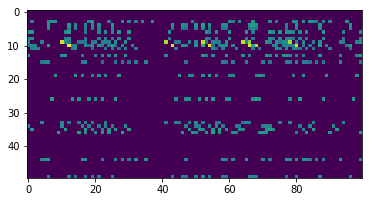

In [2]:
# Generate data

synth_dataset = Synthetic(n_components=2,
                          n_features=50,
                          n_lags=10,
                          n_timebins=100,
                          sparsity=0.75,
                          seed=0)

data = synth_dataset.generate()
plt.imshow(data)
plt.show()

In [3]:
# Fit model

model = CMF(n_components=5,
            maxlag=10,
            method='mult',
            l2_scfo=5e-3,
            l1_H=0.1,
            n_iter_max=300,
            tol=1e-6)
model.fit(data);

 18%|█▊        | 54/300 [00:00<00:00, 536.11it/s]


Reconstruction Error:  0.02016336039523037


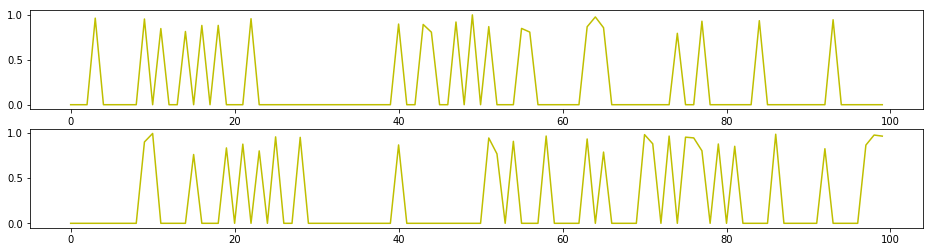

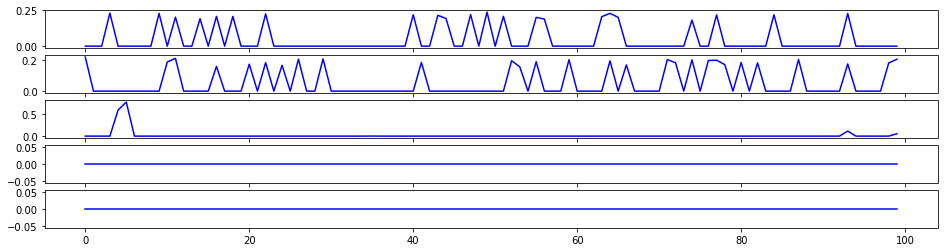

In [4]:
# Compute error, plot temporal components

error = data - model.predict()
print('Reconstruction Error: ', norm(error)**2 / norm(data)**2)

neural_order = sort_neurons(model.W)

plot_H_components(synth_dataset.H, color='y')
plot_H_components(model.H)

# TODO plot W components as well